In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from distance_calculator import calculate_distance_matrix

In [2]:
def mixed_metrix(x1, x2, **kwargs):
    """
    Mixed metric that calculates distance between two observations where only some of the attributes have an order.
    The metric is calculated as an l1 norm (manhattan distance) where the distance along each axis is calculated in the following way:

    - If the attribute has an order the distance calculated is the absolute value of the difference between the values
    - If the attribute does not have an order the distance is 0 if the values are the same and 1 otherwise

    It is advisble to preprocess the ordered variables using MinMaxScaler for better results.

    Parameters
    ----------

    x1 (array like):
    First observation.

    x2 (array like):
    Second observation.

    ordered_attr (set):
    Set of indices of attributes that do have an order.

    weights (array like):
    Array of weights that should be applied along each axis.

    Returns
    -------
    Distance between two vectors in mixed metric.
    
    """
    
    ordered_attr = kwargs['ordered'] if 'ordered' in kwargs else {}
    # weights = kwargs['weights'] if 'weights' in kwargs else [1] * len(x1)
    distance = 0

    vfunc = np.vectorize(lambda x : 0 if x == 0 else 1)

    ordered_idx = np.intersect1d(np.arange(len(x1)), np.array(list(ordered_attr)))
    unordered_idx = np.setdiff1d(np.arange(len(x1)), ordered_idx)

    distance += np.abs((x2[ordered_idx] - x1[ordered_idx])).sum()
    distance += vfunc(x2[unordered_idx] - x1[unordered_idx]).sum()

    return distance


In [2]:
attr = pd.read_csv('attr_desc.csv')
df = pd.read_csv("USCensus1990.data.txt")

In [3]:
# df_train, df_test = train_test_split(df, test_size=0.1)
ordered = attr["Ordered"]

In [4]:
df = MinMaxScaler().fit_transform(df)

In [6]:
distances = calculate_distance_matrix(df[:500,:], ordered)

In [22]:
# dbscan = DBSCAN(eps=10, metric=mixed_metrix, metric_params={'ordered': ordered}, min_samples=5)
dbscan = DBSCAN(eps=11, metric='precomputed')
labels = dbscan.fit_predict(distances)

In [24]:
tsne_projection = TSNE(n_components=2, metric='precomputed', n_iter=2000).fit_transform(distances)

c:\Users\jasie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

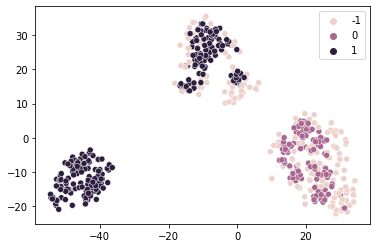

In [25]:
sns.color_palette("tab10")
sns.scatterplot(tsne_projection[:500,0], tsne_projection[:500,1], hue=labels)